In [1]:
# Goal: Perform a PCA for 1D, 2D and 3D on the IRIS dataset and compare their accuracy for the KNeighborsClassifier

# Import libraries
import numpy as np
from sklearn.datasets import load_iris # Iris dataset
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Load data
Iris_data = load_iris()
X = Iris_data["data"]
Y = Iris_data["target"]

# Print formatted data 
Formatted_X = pd.DataFrame(X, columns = Iris_data.feature_names)
print(Formatted_X)

print("") #Empty line
print("Target values:")
print(Y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

Target values:
[0 0 0 0 0 0 0 0 0 0 0 0

In [2]:
# Scale the data, center around mean, divide by standard deviation
scaler = StandardScaler()
X_centered = scaler.fit_transform(X)

Formatted_X_centered = pd.DataFrame(X_centered, columns = Iris_data.feature_names)
print(Formatted_X_centered)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 rows x 4 columns]


In [3]:
# Perform PCA Analysis, dimensionality reduction of the data by projecting it to a lower dimensional space.
# Use three different approaches for comparison: Projection to 1, 2 and 3 dimensions

# Initalise projectors
pca_1 = PCA(n_components = 1)
pca_2 = PCA(n_components = 2)
pca_3 = PCA(n_components = 3)

# Project the data
X_pca_1 = pca_1.fit_transform(X_centered)
X_pca_2 = pca_2.fit_transform(X_centered)
X_pca_3 = pca_3.fit_transform(X_centered)

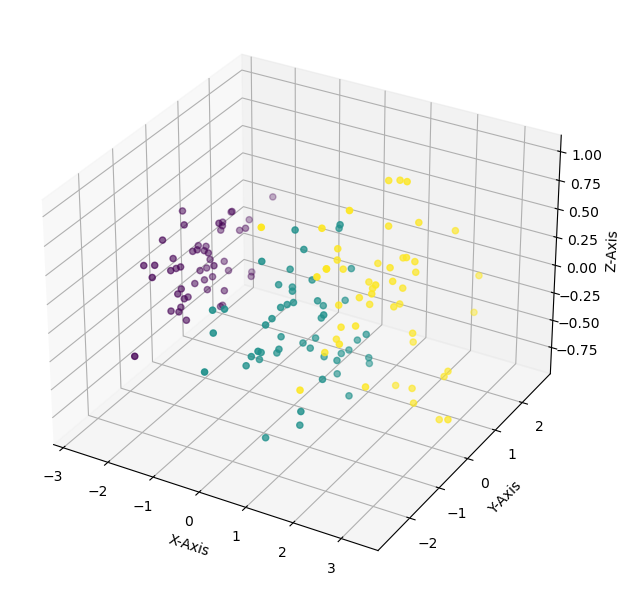

Each of the axis shown above corresponds to a row of the Projection matrix P and therefore to an eigenvector of XX^T


In [4]:
# Plot the results for 3D
figure = plt.figure(1, figsize = (12, 7.5))
ax = figure.add_subplot(111, projection = "3d")
ax.scatter(X_pca_3.T[0], X_pca_3.T[1], X_pca_3.T[2], c = Y)
ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")
plt.show()
plt.close()

print("Each of the axis shown above corresponds to a row of the Projection matrix P and therefore to an eigenvector of XX^T")

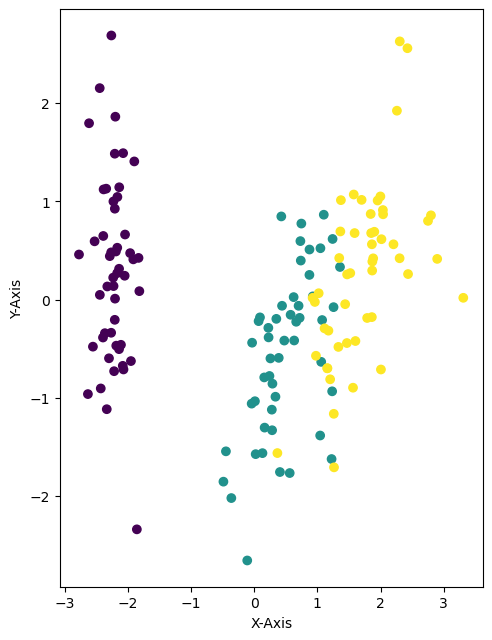

In [5]:
# Plot the results for 2D
figure = plt.figure(1, figsize = (12, 7.5))
ax = figure.add_subplot(121)
ax.scatter(X_pca_2.T[0], X_pca_2.T[1], c = Y)
ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
plt.show()
plt.close()

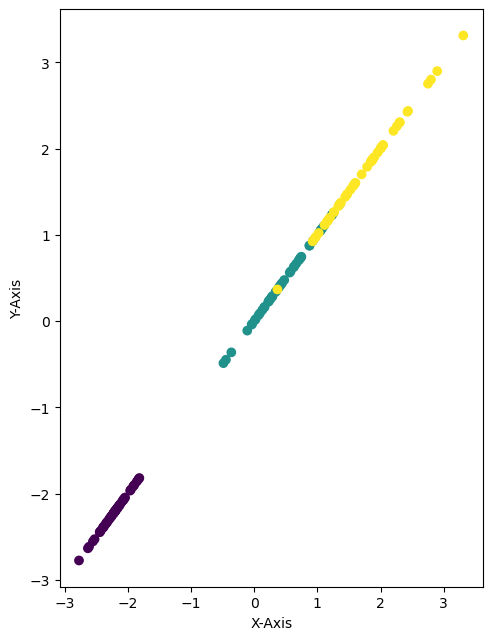

In [6]:
# Plot the results for 1D
figure = plt.figure(1, figsize = (12, 7.5))
ax = figure.add_subplot(121)
ax.scatter(X_pca_1.T[0], X_pca_1.T[0], c = Y)
ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
plt.show()
plt.close()

In [7]:
# Compare training results with and without PCA for KNeighborsClassifier

# Prepare the data for training
X_train_without_pca, X_test_without_pca, Y_train_without_pca, Y_test_without_pca = train_test_split(X_centered, Y, test_size = 0.25)
X_train_pca_1, X_test_pca_1, Y_train_pca_1, Y_test_pca_1 = train_test_split(X_pca_1, Y, test_size = 0.25)
X_train_pca_2, X_test_pca_2, Y_train_pca_2, Y_test_pca_2 = train_test_split(X_pca_2, Y, test_size = 0.25)
X_train_pca_3, X_test_pca_3, Y_train_pca_3, Y_test_pca_3 = train_test_split(X_pca_3, Y, test_size = 0.25)

# Set classifiers
clf_without_pca = KNeighborsClassifier()
clf_pca_1 = KNeighborsClassifier()
clf_pca_2 = KNeighborsClassifier()
clf_pca_3 = KNeighborsClassifier()

# Train classifier
clf_without_pca.fit(X_train_without_pca,Y_train_without_pca)
clf_pca_1.fit(X_train_pca_1,Y_train_pca_1)
clf_pca_2.fit(X_train_pca_2,Y_train_pca_2)
clf_pca_3.fit(X_train_pca_3,Y_train_pca_3)

# Perform predictions
y_pred_without_pca = clf_without_pca.predict(X_test_without_pca)
y_pred_pca_1 = clf_pca_1.predict(X_test_pca_1)
y_pred_pca_2 = clf_pca_2.predict(X_test_pca_2)
y_pred_pca_3 = clf_pca_3.predict(X_test_pca_3)

# Investigate accuracy
accuracy_without_pca =  metrics.accuracy_score(y_pred_without_pca, Y_test_without_pca)
accuracy_pca_1 =  metrics.accuracy_score(y_pred_pca_1, Y_test_pca_1)
accuracy_pca_2 =  metrics.accuracy_score(y_pred_pca_2, Y_test_pca_2)
accuracy_pca_3 =  metrics.accuracy_score(y_pred_pca_3, Y_test_pca_3)


# Print results
print("Without_PCA: Accuracy: ", accuracy_without_pca)
print("With PCA in 1D: Accuracy: ", accuracy_pca_1)
print("With PCA in 2D: Accuracy: ", accuracy_pca_2)
print("With PCA in 3D: Accuracy: ", accuracy_pca_3)

Without_PCA: Accuracy:  1.0
With PCA in 1D: Accuracy:  0.9473684210526315
With PCA in 2D: Accuracy:  0.8947368421052632
With PCA in 3D: Accuracy:  0.9210526315789473
